In [1]:
from math import sqrt,pi,exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
dtype = {'row_id': 'int64',
         'timestamp': 'int64',
         'user_id': 'int32',
         'content_id': 'int16',
         'content_type_id': 'int8',
         'task_container_id': 'int16',
         'user_answer': 'int8',
         'answered_correctly': 'int8',
         'prior_question_elapsed_time': 'float32',
         'prior_question_had_explanation': 'boolean'}

columns = ['timestamp','user_id','content_id','content_type_id','task_container_id','user_answer','answered_correctly','prior_question_elapsed_time']

In [3]:
train_df = pd.read_csv(
    '/home/yao/dataset/Riiid-AIEd-Challenge-2020/train.csv',
    header=0,
    usecols=columns,
    dtype=dtype)


# train_df = train_df[
#                     (train_df['answered_correctly']!=-1) 
# #                     &  (train_df['prior_question_elapsed_time']!=0 )
#                    ]

train_df

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
0,0,115,5692,0,1,3,1,NaN
1,56943,115,5716,0,2,2,1,37000.0
2,118363,115,128,0,0,0,1,55000.0
3,131167,115,7860,0,3,0,1,19000.0
4,137965,115,7922,0,4,1,1,11000.0
...,...,...,...,...,...,...,...,...
101230327,428564420,2147482888,3586,0,22,0,1,18000.0
101230328,428585000,2147482888,6341,0,23,3,1,14000.0
101230329,428613475,2147482888,4212,0,24,3,1,14000.0
101230330,428649406,2147482888,6343,0,25,1,0,22000.0


In [4]:
train_df["prior_question_elapsed_time"] = train_df["prior_question_elapsed_time"] // 1000

In [5]:
ques_df = pd.read_csv('/home/yao/dataset/Riiid-AIEd-Challenge-2020/questions.csv')
ques_df

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125


### 准确率统计

In [6]:
train_df1 = train_df[
    train_df['prior_question_elapsed_time'].notnull() &
    (train_df['answered_correctly']!=-1) & 
    (train_df['prior_question_elapsed_time']!=0 )
]

train_df1 = train_df1.sort_values(['user_id','content_id','timestamp'])


train_df1 = train_df1.reset_index(drop=True)
train_df1

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
0,490100,115,4,0,20,1,0,29.0
1,621464,115,6,0,26,2,1,20.0
2,398020,115,25,0,16,1,1,21.0
3,534187,115,45,0,22,2,0,19.0
4,194190,115,50,0,7,3,1,17.0
...,...,...,...,...,...,...,...,...
98430252,428692118,2147482888,7995,0,26,3,1,29.0
98430253,428449609,2147482888,8711,0,18,2,0,9.0
98430254,253883847,2147482888,9283,0,7,0,0,41.0
98430255,254416434,2147482888,9767,0,10,1,1,18.0


In [7]:
drop_lines = []
last_item = train_df1.iloc[0,:]
for (row,item) in train_df1.iloc[1:,:].iterrows():
        
    if item['content_id'] == last_item['content_id'] and item['user_id'] == last_item['user_id']:
        drop_lines.append(row)
        
    last_item = item

drop_lines

[77,
 86,
 128,
 136,
 163,
 181,
 189,
 222,
 231,
 234,
 237,
 243,
 359,
 361,
 363,
 365,
 367,
 369,
 380,
 382,
 384,
 389,
 391,
 393,
 553,
 555,
 557,
 644,
 654,
 677,
 682,
 686,
 689,
 694,
 696,
 699,
 719,
 734,
 753,
 754,
 989,
 994,
 1170,
 1194,
 1211,
 1315,
 1359,
 1849,
 1851,
 1855,
 1856,
 1860,
 1861,
 1863,
 1864,
 1867,
 1870,
 1872,
 1884,
 1886,
 1887,
 1888,
 1899,
 1900,
 1911,
 1914,
 1917,
 1918,
 1920,
 1921,
 1923,
 1926,
 1927,
 1932,
 1935,
 1941,
 1942,
 1945,
 1946,
 1951,
 1952,
 1962,
 1972,
 1981,
 1983,
 1984,
 1988,
 2000,
 2002,
 2010,
 2011,
 2012,
 2013,
 2014,
 2019,
 2020,
 2033,
 2041,
 2044,
 2050,
 2051,
 2053,
 2059,
 2062,
 2063,
 2066,
 2067,
 2069,
 2070,
 2071,
 2073,
 2074,
 2079,
 2086,
 2088,
 2091,
 2094,
 2099,
 2103,
 2105,
 2106,
 2112,
 2115,
 2116,
 2120,
 2121,
 2133,
 2137,
 2138,
 2139,
 2141,
 2143,
 2144,
 2149,
 2154,
 2156,
 2157,
 2160,
 2163,
 2164,
 2167,
 2171,
 2176,
 2183,
 2184,
 2185,
 2189,
 2190,
 2192,
 

In [8]:
train_df1 = train_df1.drop(drop_lines,axis=0)

train_df1 = train_df1.reset_index(drop=True)
train_df1

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
0,490100,115,4,0,20,1,0,29.0
1,621464,115,6,0,26,2,1,20.0
2,398020,115,25,0,16,1,1,21.0
3,534187,115,45,0,22,2,0,19.0
4,194190,115,50,0,7,3,1,17.0
...,...,...,...,...,...,...,...,...
86211625,428692118,2147482888,7995,0,26,3,1,29.0
86211626,428449609,2147482888,8711,0,18,2,0,9.0
86211627,253883847,2147482888,9283,0,7,0,0,41.0
86211628,254416434,2147482888,9767,0,10,1,1,18.0


In [9]:
# train_df1['corrected'] = (train_df1['user_answer'] == train_df1['answered_correctly'] )
# train_df1

<AxesSubplot:xlabel='content_id'>

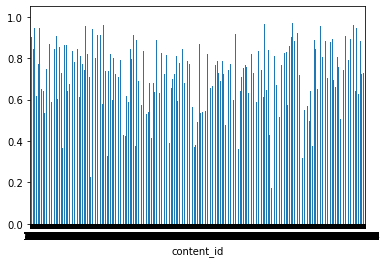

In [10]:
accuracies = train_df1.groupby(['content_id'])['answered_correctly'].agg('mean')
plt.xticks([])
accuracies.plot.bar()

In [11]:
accuracies

content_id
0        0.906750
1        0.888791
2        0.510251
3        0.768906
4        0.591484
           ...   
13518    0.788207
13519    0.563140
13520    0.667076
13521    0.807101
13522    0.914388
Name: answered_correctly, Length: 13523, dtype: float64

<AxesSubplot:xlabel='content_id'>

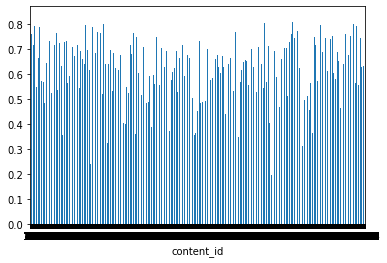

In [12]:
plt.xticks([])
difficulties = (accuracies+accuracies.mean())**0.8- accuracies.mean() #做了下缩放,向中间靠拢,避免出现0和1
difficulties.plot.bar()

In [13]:
difficulties.to_csv('difficulty.csv',header=['difficulty'])

### 单题耗时统计

train_df2 = train_df.merge(ques_df,left_on='content_id',right_on='question_id')
train_df2.drop(columns=['question_id'])

train_df2 = train_df2.sort_values(['user_id','task_container_id','content_id','timestamp'])

train_df2 = train_df2.reset_index(drop=True)
train_df2

train_df2.iloc[:30]

train_df2['timestamp'][40:80]

last_ts = train_df2['timestamp'][0]
for i,ts in train_df2['timestamp'].iteritems():
    if ts != 0:
        train_df2['timestamp'][i] = ts-last_ts
        
    


train_df2 = train_df2[
    (train_df2['timestamp']!=0) &
    ( train_df2['prior_question_elapsed_time']<60000)
]
train_df2 = train_df2.dropna()
train_df2

train_df2['content_id'].sort_values()

 params = train_df2.groupby(['content_id'])['prior_question_elapsed_time'].agg(['mean','var'])

params

def gm(i,g):
    mean,var = params[i]
    return g.apply(lambda x:exp(-(x-mean)**2/(2*var))/sqrt(2*pi*var))

def zscore_trans(g):
    return (g - g.mean()) / g.std()

def get_confidences(i,g):
    g = zscore_trans(g)
    length = len(g)
    confidences = []
    
    #     plt.hist(g)
    
    # -3 ~ 0
    df_smp = (-3<=g) & (g<0)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -3 ~ 1
    df_smp = (-3<=g) & (g<1)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -3 ~ 2
    df_smp = (-3<=g) & (g<2)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -3 ~ 3
    df_smp = (-3<=g) & (g<3)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -2 ~ 1
    df_smp = (-2<=g) & (g<1)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -2 ~ 2
    df_smp = (-2<=g) & (g<2)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -1~ 1
    df_smp = (-1<=g) & (g<1)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -1 ~ 2
    df_smp = (-1<=g) & (g<2)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # 0 ~ 3
    df_smp = (0<=g) & (g<3)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -1 ~ 3
    df_smp = (-1<=g) & (g<3)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -2~ 3
    df_smp = (-2<=g) & (g<3)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)

    return confidences

groups2 = train_df2.groupby(['content_id'])['prior_question_elapsed_time']

section = ['-3~0','-3~1','-3~2','-3~3','-2~1',
            '-2~2','-1~1','-1~2','0~3','-1~3','-2~3']
conf_data = []

for i,g in groups2:
    confidences = get_confidences(i,g)
    assert len(confidences) == len(section)
    
    conf_data.append(confidences)

time_dist = pd.DataFrame(conf_data,columns=section)
time_dist['mean'] = params['mean']
time_dist['var'] = params['var']
time_dist['content_id'] = time_dist.index
time_dist

time_dist.to_csv('time_distribution.csv',index=None,
                 columns=['content_id' 'mean', 'var','-3~0', '-3~1', '-3~2', '-3~3', '-2~1', '-2~2', '-1~1', '-1~2', '0~3', '-1~3', '-2~3'])